In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import MultipleLocator, AutoMinorLocator, FixedLocator
%matplotlib inline

In [2]:
FONT_PATH = "/Library/Fonts"
FONT_NAME = "Arial Unicode.ttf"
font = FontProperties(fname=os.path.join(FONT_PATH, FONT_NAME))

## 一般的折線圖

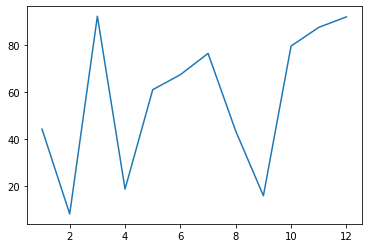

In [3]:
x_list = np.arange(1, 13)
y_list = [44.19426457, 8.1909339, 92.18200309, 18.74227427,
          60.96995208, 67.3567001, 76.39679078, 43.39376997,
          15.91217447, 79.51713484, 87.44432885, 91.9136526]

plt.plot(x_list, y_list)
plt.show()

## 長條圖

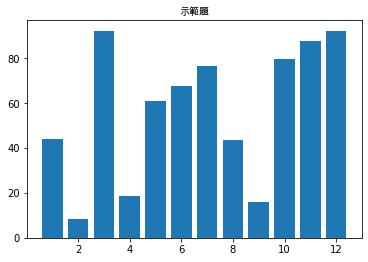

In [4]:
x_list = np.arange(1, 13)
y_list = [44.19426457, 8.1909339, 92.18200309, 18.74227427,
          60.96995208, 67.3567001, 76.39679078, 43.39376997,
          15.91217447, 79.51713484, 87.44432885, 91.9136526]

plt.bar(x_list, y_list)
plt.title('示範題', fontproperties=font)
plt.show()

## 堆疊長條圖

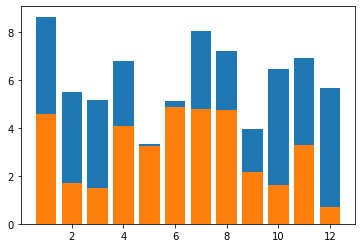

In [5]:
#y_list = np.float16(5*np.random.rand(12, ))

base_list = [4.57, 1.716, 1.492, 4.086, 3.242, 4.88, 4.797,
             4.73, 2.152 , 1.623 , 3.309 , 0.6895]
y_list = [4.074, 3.8, 3.69, 2.709, 0.077, 0.2471, 3.264, 2.5, 1.801, 4.84, 3.594, 4.996]

plt.bar(x_list, base_list, color='tab:orange')
plt.bar(x_list, y_list, bottom=base_list, color='tab:blue')
plt.show()

## 並排的長條圖

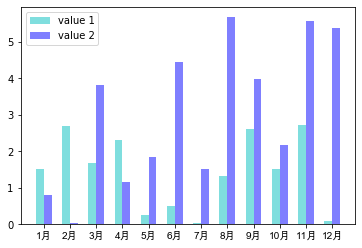

In [6]:
x = np.arange(1, 13)
y_list_1 = np.float16(3*np.random.rand(12, ))
y_list_2 = np.float16(6*np.random.rand(12, ))

bar_width = 0.3
tick_label = [f"{i}月" for i in range(1, 13)]

plt.bar(x, y_list_1, align="center", color="c", width=bar_width,label="value 1", alpha=0.5)
plt.bar(x+bar_width, y_list_2, align="center", color="b", width=bar_width, label="value 2", alpha=0.5)

plt.xticks(x+bar_width/2, tick_label, fontproperties=font)
plt.legend()

plt.show()

## 雙軸的圖

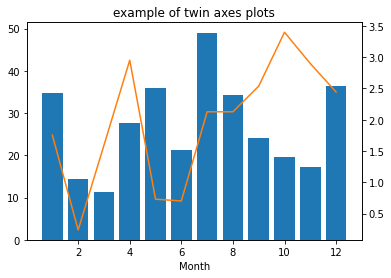

In [7]:
np.random.seed(123)
y_list_1 = np.float16(50*np.random.rand(12, ))
y_list_2 = np.float16(4*np.random.rand(12, ))

fig, ax1 = plt.subplots()
plt.title('example of twin axes plots')
ax1.bar(range(1, 13), y_list_1, color='tab:blue')
plt.xlabel('Month')

ax2 = ax1.twinx()
ax2.plot(range(1, 13), y_list_2, color='tab:orange')
#plt.savefig('example.jpg')
plt.show()

## 給圖表的高度

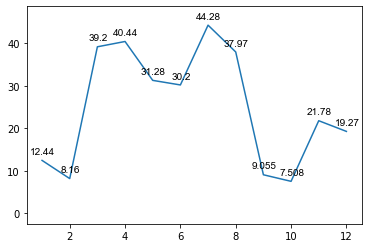

In [8]:
np.random.seed(456)
x_list = range(1, 13)
y_list = np.float16(50*np.random.rand(12, ))

plt.plot(x_list, y_list)
plt.ylim(np.min(y_list) - 10, np.max(y_list)*1.1)
for x, y in zip(x_list, y_list):
    plt.text(x+0.02, y+1, y, ha='center', va='bottom', fontproperties=font)

plt.show()

## 圖示 (annotations)
ref: [link](https://www.itread01.com/content/1544608110.html)

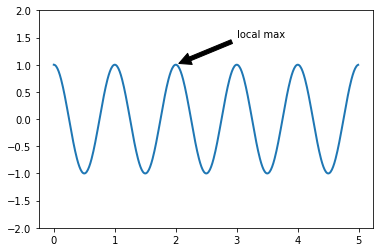

In [9]:
# 繪製一個餘弦曲線
x_list = np.arange(0.0, 5.0, 0.01)
y_list = np.cos(2*np.pi*x_list)

fig, ax = plt.subplots()
line, = ax.plot(x_list, y_list, lw=2)

# 繪製一個黑色，兩端縮排的箭頭
ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            xycoords='data',
            arrowprops=dict(facecolor='black', shrink=0.05)
            )
ax.set_ylim(-2, 2)
plt.show()

## 子圖
* 顯示整張圖主標題
* 各子圖也有子標題

In [10]:
def horizontal_flip_exp(x):
    return np.exp(-x)

def cubic(x):
    return x ** 3

In [11]:
x_list = np.arange(-5, 5, 0.1)
function_list = [
    np.sin, np.cos, np.tan, np.exp, horizontal_flip_exp, cubic
]

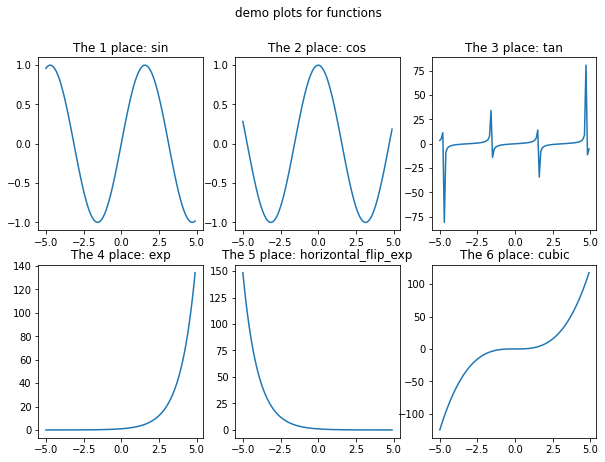

In [12]:
plt.figure(figsize=(10, 7))
for i, f in zip(range(1, 7), function_list):
    plt.subplot(2, 3, i)
    plt.title(f"The {i} place: {f.__name__}")
    plt.plot(x_list, f(x_list))
plt.suptitle('demo plots for functions')
plt.show()

## 修改副軸的刻度

### 製造 y 的副軸，並且修改刻度

In [13]:
exchange_rate = pd.read_csv('exchange_rate_20220419.csv')
exchange_rate.columns = [col.replace('／', '/') for col in exchange_rate.columns]

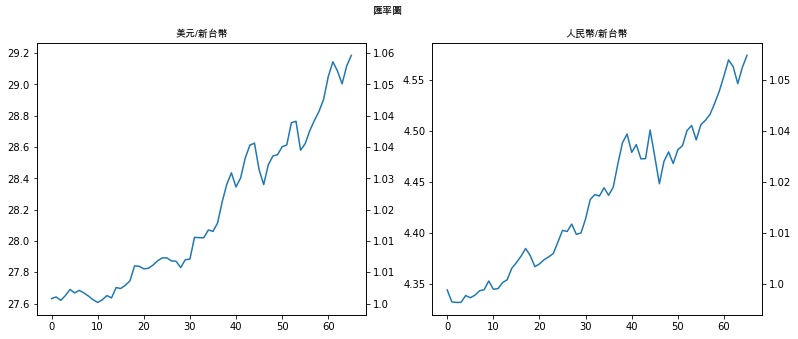

In [14]:
coin_list = ['美元/新台幣', '人民幣/新台幣']

cnt = len(coin_list)

fig, ax = plt.subplots(1, cnt, figsize=(13, 5))

plt.suptitle('匯率圖', fontproperties=font)

for i, col in enumerate(coin_list):
    ax[i].set_title(col, fontproperties=font)
    ax[i].plot(range(exchange_rate.shape[0]), exchange_rate[col])
    base_exchange_rate = exchange_rate[col][0]

    ytick_loc = ax[i].get_yticks()
    second_ytick_loc = [round(p / base_exchange_rate, 2) for p in ytick_loc]
    ax[i].yaxis.set_major_locator(FixedLocator(ytick_loc))

    secax = ax[i].twinx()
    secax.set_ylim(ax[i].get_ylim())
    secax.yaxis.set_major_locator(FixedLocator(ytick_loc))
    secax.yaxis.set_ticklabels(second_ytick_loc)

### 修改 x 刻度為 $\pi$ 的倍數

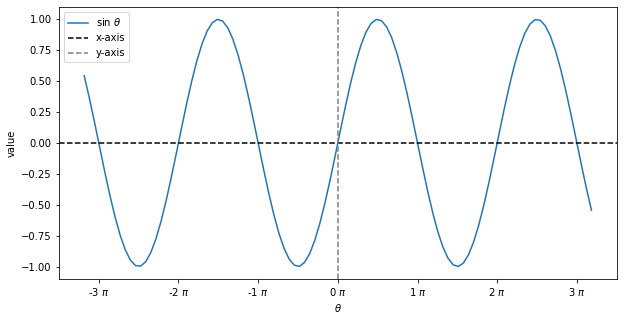

In [15]:
x_list = np.linspace(-10, 10, 100)
y_list = np.sin(x_list)

fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(x_list, y_list, label='sin $\\theta$')
plt.axhline(0, linestyle='--', color='black', label='x-axis')
plt.axvline(0, linestyle='--', color='gray', label='y-axis')
plt.xlabel('$\\theta$')
plt.ylabel('value')

x_locator = MultipleLocator(np.pi)
ax.xaxis.set_major_locator(x_locator)
xtick_loc = ax.get_xticks()
revised_xtick_loc = [f'{int(p/np.pi)} $\pi$' for p in xtick_loc]
ax.xaxis.set_ticklabels(revised_xtick_loc)
plt.legend()
plt.show()